# Country Dissimilarities
This example, taken from Kaufman and Rousseeuw (1990), comes from a study in which political science students were asked to provide pairwise dissimilarity measures for 12 countries: Belgium, Brazil, Chile, Cuba, Egypt, France, India, Israel, United States, Union of Soviet Socialist Republics, Yugoslavia and Zaire.

In [1]:
import pandas as pd
from matplotlib import transforms, pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
import numpy as np

%matplotlib inline

# define plots common properties and color constants
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY1, GRAY4, GRAY7 = '#231F20', '#646369', '#929497'

## Load and Prepare Data

In [2]:
# PAGE 517. TABLE 14.3. Data from a political science survey: values are
#           average pairwise dissimilarities of countries from a questionnaire
#           given to political science students.
df = pd.read_csv("../data/Countries.txt", sep=' ')
countries = np.array([
    'BEL', 'BRA', 'CHI', 'CUB', 'EGY', 'FRA',
    'IND', 'ISR', 'USA', 'USS', 'YUG', 'ZAI'])
df

,Country,BEL,BRA,CHI,CUB,EGY,FRA,IND,ISR,USA,USS,YUG,ZAI
0,BEL,0.00,5.58,7.00,7.08,4.83,2.17,6.42,3.42,2.50,6.08,5.25,4.75
1,BRA,5.58,0.00,6.50,7.00,5.08,5.75,5.00,5.50,4.92,6.67,6.83,3.00
2,CHI,7.00,6.50,0.00,3.83,8.17,6.67,5.58,6.42,6.25,4.25,4.50,6.08
3,CUB,7.08,7.00,3.83,0.00,5.83,6.92,6.00,6.42,7.33,2.67,3.75,6.67
4,EGY,4.83,5.08,8.17,5.83,0.00,4.92,4.67,5.00,4.50,6.00,5.75,5.00
5,FRA,2.17,5.75,6.67,6.92,4.92,0.00,6.42,3.92,2.25,6.17,5.42,5.58
6,IND,6.42,5.00,5.58,6.00,4.67,6.42,0.00,6.17,6.33,6.17,6.08,4.83
7,ISR,3.42,5.50,6.42,6.42,5.00,3.92,6.17,0.00,2.75,6.92,5.83,6.17
8,USA,2.50,4.92,6.25,7.33,4.50,2.25,6.33,2.75,0.00,6.17,6.67,5.67
9,USS,6.08,6.67,4.25,2.67,6.00,6.17,6.17,6.92,6.17,0.00,3.67,6.50


## K-medoids Clustering

In [3]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.manifold import MDS

In [4]:
# PAGE 517. We applied 3-medoid clustering to these dissimilarities. Note that
#           K-means clustering could not be applied because we have only
#           distances rather than raw observations.
matrix = df[countries].values
initial_medoids = [0, 1, 2]
kmedoids_instance = kmedoids(
    matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [5]:
# PAGE 570. Multidimensional scaling seeks values z1,z2,... ,zN ∈ R^k to
#           minimize the so-called stress function (14.98). This is known as
#           least squares or Kruskal–Shephard scaling. The idea is to find a
#           lower-dimensional representation of the data that preserves the
#           pairwise distances as well as possible.
mds = MDS(
    n_components=2,
    dissimilarity='precomputed',
    random_state=14
).fit_transform(matrix)

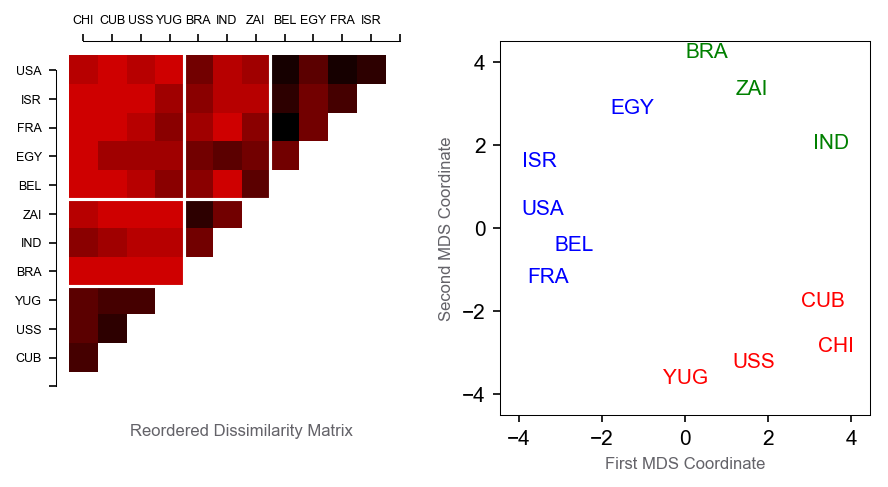

In [6]:
# PAGE 518. FIGURE 14.10. Survey of country dissimilarities. (Left panel:)
#           dissimilarities reordered and blocked according to 3-medoid
#           clustering. Heat map is coded from most similar (dark red) to least
#           similar (bright red). (Right panel:) two-dimensional
#           multidimensional scaling plot, with 3-medoid clusters indicated by
#           different colors.
fig, axarr = plt.subplots(1, 2, figsize=(7, 3.3), dpi=150)
ax = axarr[0]

rows = ['USA', 'ISR', 'FRA', 'EGY', 'BEL', 'ZAI',
        'IND', 'BRA', 'YUG', 'USS', 'CUB']
cols = ['CHI', 'CUB', 'USS', 'YUG', 'BRA', 'IND',
        'ZAI', 'BEL', 'EGY', 'FRA', 'ISR']
row_ids = [list(countries).index(c) for c in rows]
col_ids = [list(countries).index(c) for c in cols]

m = matrix[row_ids, :][:, col_ids]
pct = np.percentile(np.unique(m), [3, 5, 8, 20, 30, 40, 50, 60, 70, 80, 90])
for i in range(m.shape[0]):
    for j in range(m.shape[1]-i, m.shape[1]):
        m[i, j] = np.nan
cmap = LinearSegmentedColormap.from_list('cm', ['black', '#CF0000'], N=256)
norm = BoundaryNorm(pct, cmap.N)
ax.imshow(m, interpolation='none', norm=norm, cmap=cmap)
ax.axhline(4.5, color='white')
ax.axhline(7.5, color='white')
ax.axvline(3.5, color='white')
ax.axvline(6.5, color='white')
ax.tick_params(bottom=False, labelbottom=False, top=True, labeltop=True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
_ = plt.setp(ax,
             yticks=range(12), yticklabels=rows+[''],
             xticks=range(12), xticklabels=cols+[''])
ax.set_xlim(-1, 12)
ax.set_ylim(12, -1)
ax.spines['top'].set_bounds(0, 11)
ax.spines['left'].set_bounds(0, 11)
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(6)
ax.set_xlabel('Reordered Dissimilarity Matrix', color=GRAY4, fontsize=8)
ax.set_aspect('equal', 'datalim')

ax = axarr[1]
mds_rev = -mds
for i, txt in enumerate(countries):
    cluster = [t for t in range(3) if i in clusters[t]][0]
    plt.annotate(txt, (mds_rev[i, 0], mds_rev[i, 1]), ha='center',
                 color=['b', 'g', 'r'][cluster])
ax.set_xlabel('First MDS Coordinate', color=GRAY4, fontsize=8)
ax.set_ylabel('Second MDS Coordinate', color=GRAY4, fontsize=8)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.set_aspect('equal', 'datalim')